# Superstore Gold Membership Campaign Analysis
This notebook contains data cleaning, exploratory data analysis, and visualization steps for identifying factors influencing customer response to a Gold Membership offer.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("superstore_data.csv")
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Convert the customer join date to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
# Fill missing income values with the median income
df['Income'] = df['Income'].fillna(df['Income'].median())

In [ ]:
# One-hot encode categorical variables 'Education' and 'Marital_Status'
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

In [ ]:
# Create a simpler 'MaritalStatus' column for visualization
df["MaritalStatus"] = df[[
    "Marital_Status_Divorced", "Marital_Status_Married", "Marital_Status_Single",
    "Marital_Status_Together", "Marital_Status_Widow", "Marital_Status_YOLO",
    "Marital_Status_Alone"
]].idxmax(axis=1).str.replace("Marital_Status_", "")

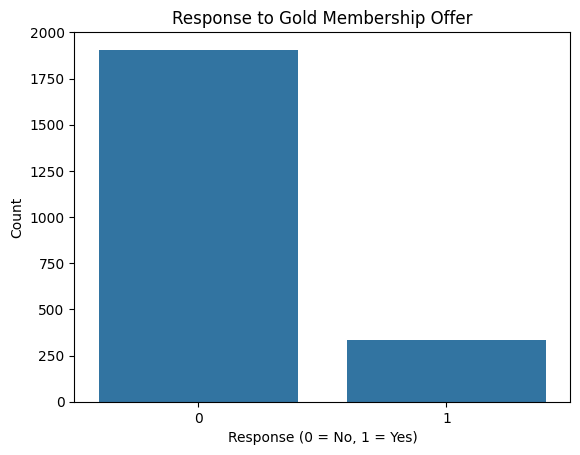

In [ ]:
# Plot distribution of response (0 = No, 1 = Yes)
sns.countplot(x="Response", data=df)
plt.title("Response to Gold Membership Offer")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

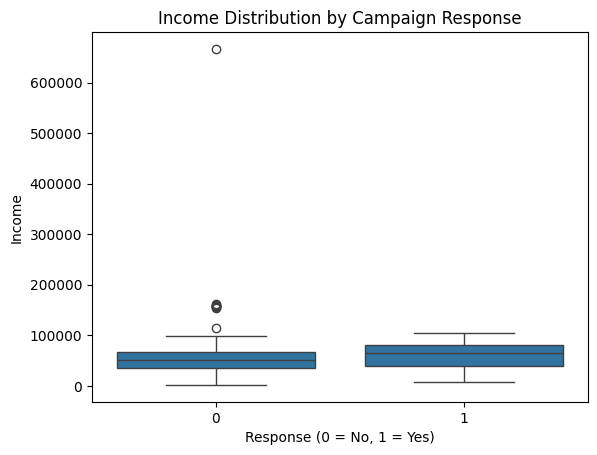

In [ ]:
# Plot income distribution by campaign response
sns.boxplot(x="Response", y="Income", data=df)
plt.title("Income Distribution by Campaign Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Income")
plt.show()

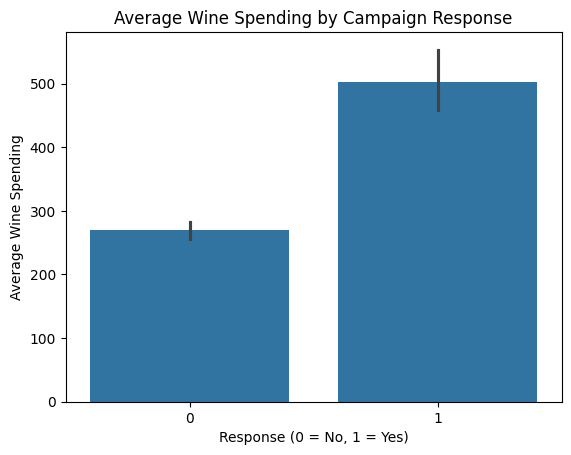

In [ ]:
# Plot average wine spending by response
sns.barplot(x="Response", y="MntWines", data=df)
plt.title("Average Wine Spending by Campaign Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Average Wine Spending")
plt.show()

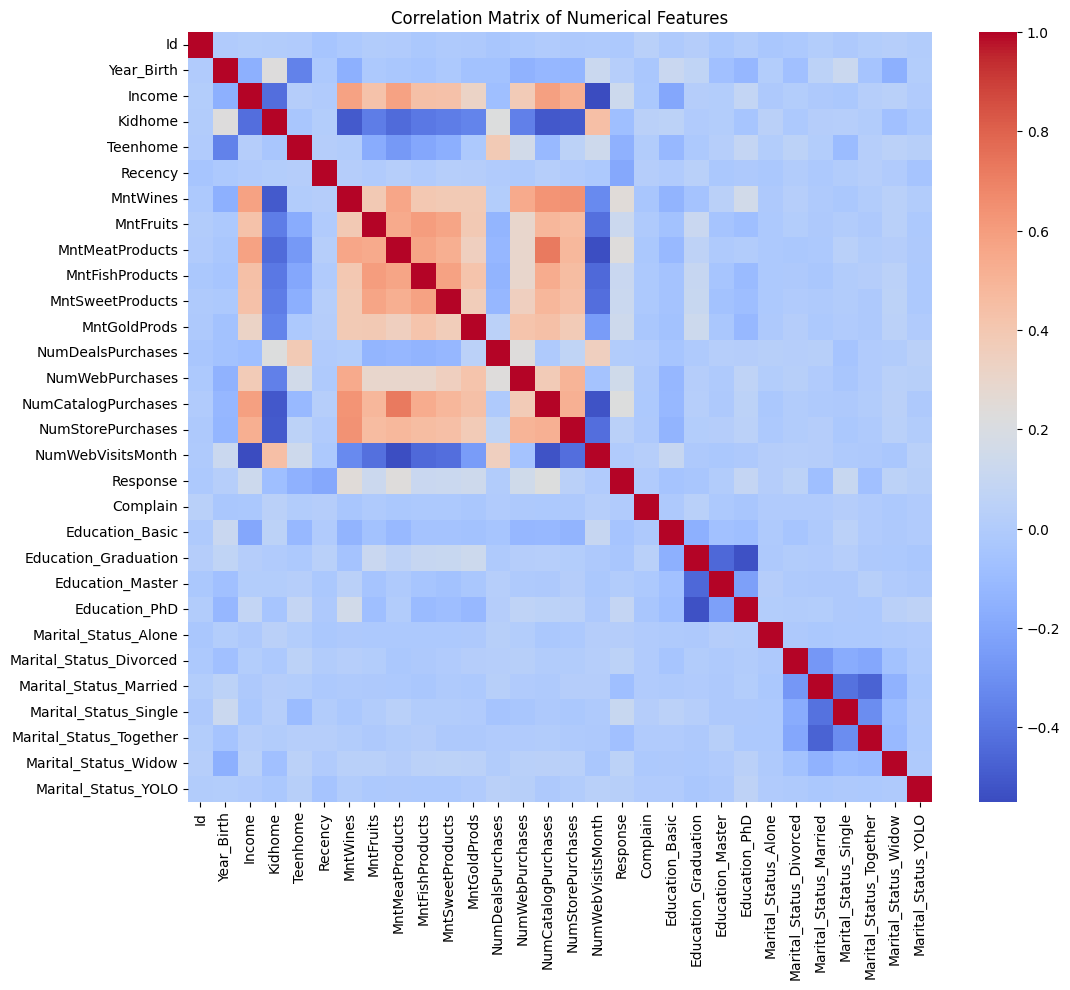

In [ ]:
# Plot correlation heatmap of all numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

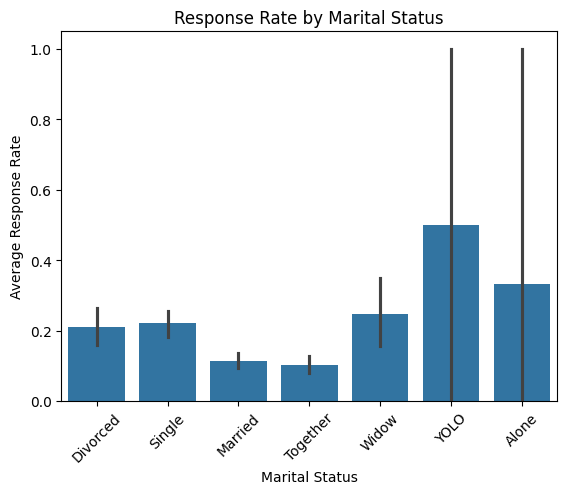

In [ ]:
# Plot average response rate by marital status
sns.barplot(x="MaritalStatus", y="Response", data=df)
plt.title("Response Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Response Rate")
plt.xticks(rotation=45)
plt.show()

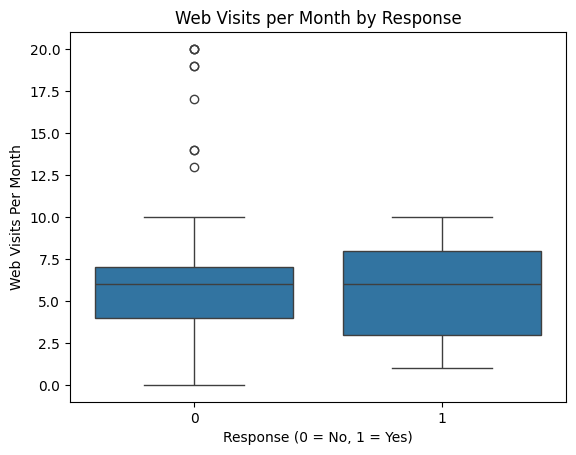

In [ ]:
# Plot web visits per month by campaign response
sns.boxplot(x="Response", y="NumWebVisitsMonth", data=df)
plt.title("Web Visits per Month by Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Web Visits Per Month")
plt.show()

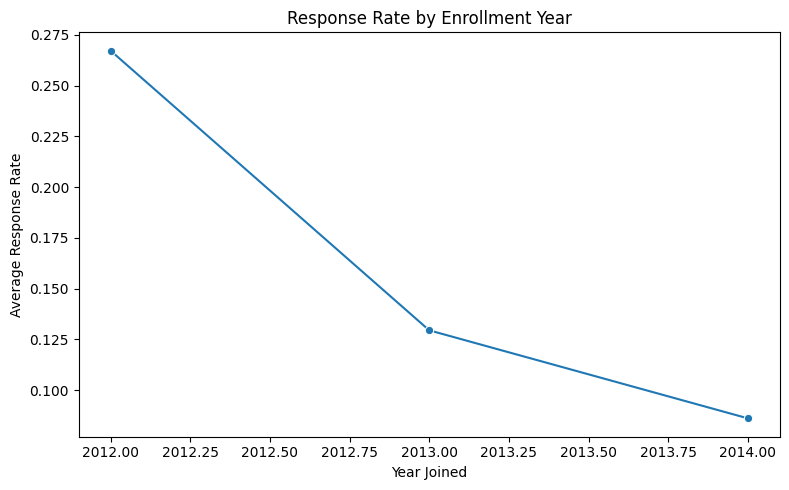

In [ ]:
# Extract enrollment year from customer join date
df['Year_Customer_Joined'] = df['Dt_Customer'].dt.year

# Calculate average response rate by year of joining
response_by_year = df.groupby('Year_Customer_Joined')['Response'].mean().reset_index()

# Plot response rate over enrollment years
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year_Customer_Joined', y='Response', data=response_by_year, marker="o")
plt.title('Response Rate by Enrollment Year')
plt.xlabel('Year Joined')
plt.ylabel('Average Response Rate')
plt.tight_layout()
plt.show()

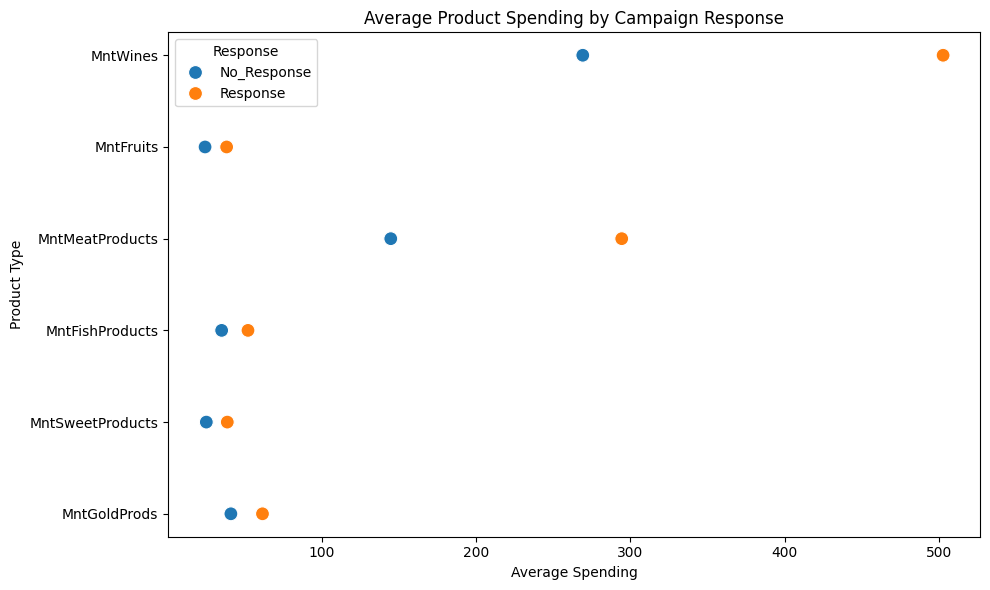

In [ ]:
# Define product spending columns for comparison
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate average spending for responders vs non-responders
spending_means = df.groupby('Response')[spend_cols].mean().T
spending_means.columns = ['No_Response', 'Response']
spending_means = spending_means.reset_index().rename(columns={'index': 'Product'})

# Reshape data for plotting with seaborn
spending_melted = spending_means.melt(id_vars='Product',
                                      value_vars=['No_Response', 'Response'],
                                      var_name='Response Type',
                                      value_name='Average Spending')

# Plot average spending by product type and response
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spending_melted, x='Average Spending', y='Product', hue='Response Type', s=100)
plt.title('Average Product Spending by Campaign Response')
plt.xlabel('Average Spending')
plt.ylabel('Product Type')
plt.legend(title='Response')
plt.tight_layout()
plt.show()